## Crude and Age-standardized COPD death rate for in the US and Uganda (2019)

### Project Description

The aim of the following project is to calculate the crude and the age-standardized chronic obstructive pulmonary disease (COPD) death rates in both the United States and Uganda in 2019. 

The crude death rate (CDR) is a demographic measure that represents the number of deaths occurring in a given population over a specific period, usually per 1,000 or 100,000 individuals.

The CDR is calculated as followed

CDR = (Number of death / Population) * multiplier

We will work with the multiplier 100000

To calculate the overall age standardized crude death rate we will apply average standardized population rates from 2000 to 2025. 

Data from the following sources will be used:
1. UN World Population Prospects (2022) — Population Estimates 1950-2021
2. WHO Standard Population — Table 1 in 'Ahmad OB, Boschi-Pinto C, Lopez AD, Murray CJ, Lozano R, Inoue M (2001). Age standardization of rates: a new WHO standard.'
3. A table of COPD death rates for the USA and Uganda in 2019 provided by the company Our World in Data

More information on the imported data can be found the README.md in following Github respository: https://github.com/claudiawiese/COPD_death_rates

### Import Relevant Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

### Import Data

In [2]:
df_COPD = pd.read_csv("./db/Age_specific_death_rates_COPD.csv")
df_std_pop = pd.read_csv("./db/WHO_World_Standard_Population_Distribution.csv")
df_pop = pd.read_csv("./db/UN_Pop_estimates_USA_UGA_WORLD_2019.csv")

In [3]:
display(df_COPD.head())
#Let's rename the Age group (years) column same column names in all datasets
df_COPD = df_COPD.rename(columns={"Age group (years)": 'AgeGroup'})
df_COPD.head(20)

,Age group (years),"Death rate, United States, 2019","Death rate, Uganda, 2019"
0,0-4,0.04,0.40
1,5-9,0.02,0.17
2,10-14,0.02,0.07
3,15-19,0.02,0.23
4,20-24,0.06,0.38


,AgeGroup,"Death rate, United States, 2019","Death rate, Uganda, 2019"
0,0-4,0.04,0.40
1,5-9,0.02,0.17
2,10-14,0.02,0.07
3,15-19,0.02,0.23
4,20-24,0.06,0.38
5,25-29,0.11,0.40
6,30-34,0.29,0.75
7,35-39,0.56,1.11
8,40-44,1.42,2.04
9,45-49,4.00,5.51


In [4]:
display(df_std_pop.head(5))
#Let's rename the columns to have in all datasets same column name, i.e. shorter column names
age = df_std_pop.columns[0]
world_pop = df_std_pop.columns[1]
df_std_pop = df_std_pop.rename(columns={age: 'AgeGroup',world_pop:"WorldStdPop"})
df_std_pop

,Age group,World Average 2000-2025
0,0-4,8.86
1,5-9,8.69
2,10-14,8.60
3,15-19,8.47
4,20-24,8.22


,AgeGroup,WorldStdPop
0,0-4,8.86
1,5-9,8.69
2,10-14,8.60
3,15-19,8.47
4,20-24,8.22
5,25-29,7.93
6,30-34,7.61
7,35-39,7.15
8,40-44,6.59
9,45-49,6.04


In [5]:
display(df_pop.head())

,Country,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,100+
0,UGA,1554.0610,1502.8655,1456.0630,1420.8655,1395.1130,1371.7535,1349.8900,1325.7125,1298.6150,...,0.9030,0.6455,0.453,0.3145,0.217,0.1510,0.1060,0.0795,0.063,0.096
1,USA,3821.4520,3891.1895,3980.3645,4056.3350,4099.2150,4100.4910,4097.4780,4115.7590,4153.0620,...,387.9285,327.0625,250.259,185.5070,169.382,133.0355,88.3585,65.0955,45.883,78.955
2,WORLD,135471.3315,136690.5030,137972.5445,137497.4135,137240.8285,137186.0270,137066.6415,136118.4955,134449.4055,...,4049.6775,3201.6670,2483.424,1872.8950,1399.148,1009.4960,703.4530,489.6295,316.196,503.572


### Data Processing

In [6]:
#let's transform the df_pop data set to match the format of the other two data sets 
df_pop = df_pop.transpose()

In [7]:
df_pop = df_pop.set_axis(['UGA', 'USA', 'WORLD'], axis='columns')
df_pop = df_pop.drop(df_pop.index[0])

In [8]:
df_pop.head()

,UGA,USA,WORLD
0,1554.061,3821.452,135471.3315
1,1502.8655,3891.1895,136690.503
2,1456.063,3980.3645,137972.5445
3,1420.8655,4056.335,137497.4135
4,1395.113,4099.215,137240.8285


In [9]:
#As the df_pop data is not grouped by age groups we have to do it by ourselves 
bins = range(0,106,5)
labels = [f'{i}-{i+4}'for i in range(0,101,5)]
df_pop.rename(index={df_pop.index[-1]: '100'}, columns={'UGA': 'PopUGA', 'USA': 'PopUSA', 'WORLD': 'PopWORLD'}, inplace=True)

# Group the data into age groups
df_pop['Age'] = pd.cut(df_pop.index.astype('int'), bins=bins, labels=labels, right=False)
df_pop_agg = df_pop.groupby('Age').aggregate({'PopUGA': 'sum', 'PopUSA': 'sum', 'PopWORLD': 'sum'})

In [10]:
#In order to merge this new table with the other tables we need to merge the age groups from 85 years onwards
over_85= df_pop_agg.tail(4)
pop_uga_sum = over_85['PopUGA'].sum()
pop_usa_sum = over_85['PopUSA'].sum()
pop_world_sum = over_85['PopWORLD'].sum()
df_pop_agg
df_pop_agg.iloc[17] = [pop_uga_sum, pop_usa_sum, pop_world_sum]
df_pop_agg = df_pop_agg.drop(df_pop_agg.tail(3).index)

#We just add the 'AgeGroup' column to easly merge the data set with the other ones 
df_pop_agg['AgeGroup'] = df_std_pop['AgeGroup'].values
df_pop_agg

,PopUGA,PopUSA,PopWORLD,AgeGroup
Age,,,,
0-4,7328.968,19848.556,684872.621,0-4
5-9,6614.4205,20697.0755,678417.166,5-9
10-14,5899.4005,22092.1675,645915.768,10-14
15-19,5151.082,21895.1225,615536.005,15-19
20-24,4348.173,21871.8085,596534.013,20-24
25-29,3499.504,23406.9275,603855.871,25-29
30-34,2618.559,22842.1515,592985.944,30-34
35-39,1903.175,22296.9525,540438.207,35-39
40-44,1503.6695,20694.5555,485895.6165,40-44


In [11]:
#Now merge the df_pop_agg data set with df_COPD and the df_std_pop data set
df = pd.merge(df_COPD, df_pop_agg, on='AgeGroup', how='inner')
df = pd.merge(df, df_std_pop, on='AgeGroup', how='inner')
df

,AgeGroup,"Death rate, United States, 2019","Death rate, Uganda, 2019",PopUGA,PopUSA,PopWORLD,WorldStdPop
0,0-4,0.04,0.40,7328.968,19848.556,684872.621,8.86
1,5-9,0.02,0.17,6614.4205,20697.0755,678417.166,8.69
2,10-14,0.02,0.07,5899.4005,22092.1675,645915.768,8.60
3,15-19,0.02,0.23,5151.082,21895.1225,615536.005,8.47
4,20-24,0.06,0.38,4348.173,21871.8085,596534.013,8.22
5,25-29,0.11,0.40,3499.504,23406.9275,603855.871,7.93
6,30-34,0.29,0.75,2618.559,22842.1515,592985.944,7.61
7,35-39,0.56,1.11,1903.175,22296.9525,540438.207,7.15
8,40-44,1.42,2.04,1503.6695,20694.5555,485895.6165,6.59
9,45-49,4.00,5.51,1234.979,21244.2585,477194.9815,6.04


### Calculate Overall Crude Death rate

Now, that we have a merged the different datasets, we are ready to calculate the over crude death rate. We already have the age specific death rate of CODP in the two Death rate columns. So let's use them to caclulate the total death rate for all ages.

**Note:**
The population of Uganda and the USA is in thousands

In [12]:
pop_uga = (df['PopUGA']*1000)
pop_usa = (df['PopUSA']*1000)

#calculate the weighted CDR rate 
df['Weighted_CDR_UGA'] = df['Death rate, Uganda, 2019'] * pop_uga
df['Weighted_CDR_USA'] = df['Death rate, United States, 2019'] * pop_usa

#calaculate the total CDR rate
total_cdr_UGA = df['Weighted_CDR_UGA'].sum() / (pop_uga.sum())
total_cdr_USA = df['Weighted_CDR_USA'].sum() / (pop_usa.sum())

print('The overall CODP crude death rate per 100,000 individuals for Uganda in 2019 is:',np.round(total_cdr_UGA,1))
print('The overall CODP crude death rate per 100,000 individuals for the United States in 2019 is:',np.round(total_cdr_USA,1))

The overall CODP crude death rate per 100,000 individuals for Uganda in 2019 is: 5.8
The overall CODP crude death rate per 100,000 individuals for the United States in 2019 is: 57.2


The high COPD crude death rate for the US compared to Uganda might be explained by the fact that old people generally have a higher death rate and the US has a lot more old people than Uganda.

Let's check the age distribution of both countries with a barplot.

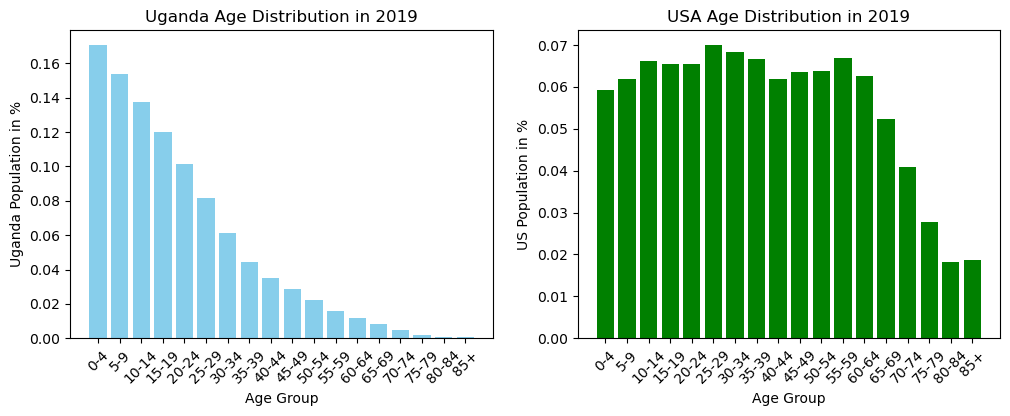

In [13]:
#graphing the age distributions for Uganda and the US in 2019
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].bar(df['AgeGroup'], df['PopUGA']/df['PopUGA'].sum(), color='skyblue')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Uganda Population in %')
axes[0].set_title('Uganda Age Distribution in 2019')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(df['AgeGroup'], df['PopUSA']/df['PopUSA'].sum(), color='green')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('US Population in %')
axes[1].set_title('USA Age Distribution in 2019')
axes[1].tick_params(axis='x', rotation=45)

As we can see Uganda's age distribution is highly skewed to the right because there is a high percentage of young people and a low percentage of old people. 

The US population is more evenly distributed, there is a higer percentage of old people than in Uganda.

To be able to really compare the COPD countries we need to calculate the overall age-standardized death date for COPD by using the age-standardized world population rates.  

### Calculate Overall Age-standardized Death Rate for COPD

In [14]:
#calculate the standardized population by age for Uganda and the US by applying the world rates
std_uga_pop = (df['WorldStdPop']/100) * df['PopUGA'].sum()
std_usa_pop = (df['WorldStdPop']/100) * df['PopUSA'].sum()
df['StdPopUGA'] = std_uga_pop
df['StdPopUSA'] = std_usa_pop

pop_std_uga = df['StdPopUGA'] * 1000
pop_std_usa = df['StdPopUSA'] * 1000

Before calculating the new total CODP crude death rate, let's see graph the new population distributions and see if both distribution look alike. 

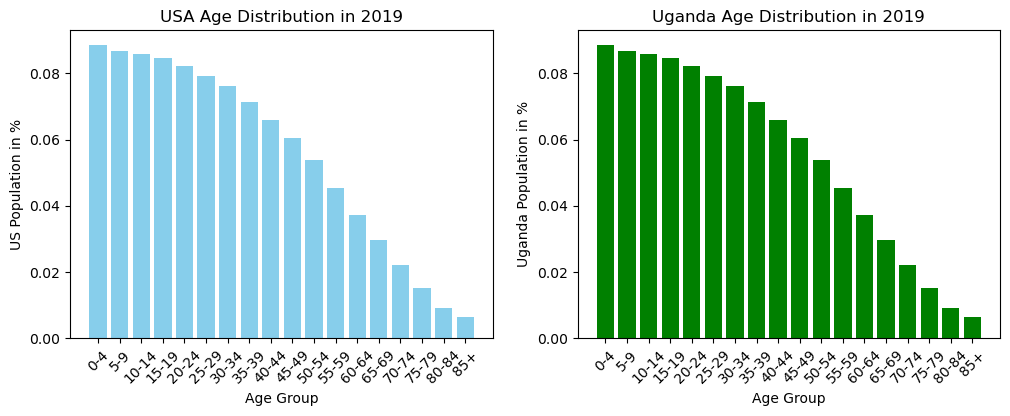

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].bar(df['AgeGroup'], df['StdPopUSA']/df['PopUSA'].sum(), color='skyblue')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('US Population in %')
axes[0].set_title('USA Age Distribution in 2019')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(df['AgeGroup'], df['StdPopUGA']/df['PopUGA'].sum(), color='green')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Uganda Population in %')
axes[1].set_title('Uganda Age Distribution in 2019')
axes[1].tick_params(axis='x', rotation=45)

Indeed by applying the average world standardized population rates from 2000-2025, we get the same age distribution for each country.

So now we are sure the standardization was succesful, let's calculate the CODP crude death rates per 100000 individuals.

In [16]:
#calculate that weighted CDR rates for the standardized populations
df['Weighted_Std_CDR_UGA'] = df['Death rate, Uganda, 2019'] * pop_std_uga
df['Weighted_Std_CDR_USA'] = df['Death rate, United States, 2019'] * pop_std_usa

#calculate the total standardized CDR rate for each country 
total_std_cdr_UGA = df['Weighted_Std_CDR_UGA'].sum() / (pop_uga.sum())
total_std_cdr_USA = df['Weighted_Std_CDR_USA'].sum() / (pop_usa.sum())

print('Results with age standardized population for each country:')
print('The overall COPD crude death rate per 100,000 individuals for Uganda is:',np.round(total_std_cdr_UGA,1))
print('The overall COPD crude death rate per 100,000 individuals for the United States is:',np.round(total_std_cdr_USA,1))

Results with age standardized population for each country:
The overall COPD crude death rate per 100,000 individuals for Uganda is: 28.7
The overall COPD crude death rate per 100,000 individuals for the United States is: 28.4


The result shows that the total crude death rate per 100000 individuals of Uganda is slightly higher than the one of the US when using the standardized populations (i.e. assuming Uganda and the US have the same age distribution). 